# Prediction Comparison

Iterate over recorded datasets and produce subgoal predictions and confidence where applicable.

Three modes:
1. Deterministic Prediction
2. Bayesian Prediction
3. Bayesian MVN Prediction

In [9]:
%matplotlib notebook

import exc_analysis.plotting as excplt
import exc_analysis.learning as lrn
import exc_analysis.kinematics as kin
import exc_analysis.prediction as pred
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
import bqplot.pyplot as bplt
import bqplot

mpl.style.use('mitch-exp')

In [2]:
ls trial_data/

manual_mitch_0522_01.csv      manual_orlando_1102_1405.csv
manual_mitch_0522_02.csv      manual_orlando_1102_1413.csv
manual_mitch_1101_2319.csv    manual_orlando_1102_1418.csv
manual_mitch_1101_2333.csv    manual_shyam_1101_2012.csv
manual_mitch_1102_1814.csv    manual_shyam_1102_1824.csv
manual_mitch_1102_1819.csv


In [11]:
ddir = 'trial_data/'
fnames = ['manual_mitch_0522_01.csv', 'manual_mitch_0522_02.csv']
dfs = []

for fn in fnames:
    dfs.append(pd.read_csv(ddir + fn))
    dfs[-1].set_index('Time', inplace=True)

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms
Time,,,,,,,,
0.005514,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0
0.063504,0.0,0.0,0.0,0.0,10.272,7.970000,4.591245,0.0
0.115737,0.0,0.0,0.0,0.0,10.272,7.970000,4.614792,0.0
0.202312,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0
0.302759,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0


____

In [4]:
reload(pred)

<module 'exc_analysis.prediction' from '/Users/mitchallain/Development/Python/exc_analysis/exc_analysis/prediction.pyc'>

In [5]:
ls

BNIRL-test.ipynb                   gmm_model_0524.pkl
BNIRL_subgoal_states.gif           gmm_model_exp.pkl
action-primitives.ipynb            jp_extras.py
bnirl-action-direction.ipynb       jupyter_extras.pyc
bnirl.ipynb                        plot_gmm_sin.ipynb
bnirl_dir_results.pkl              prediction-final.ipynb
change-point-clustering-new.ipynb  prediction.log
change-point-clustering.ipynb      sgs_0413.py
exc-render.ipynb                   sgs_0413.pyc
exc.mat                            task-learning.ipynb
figs/                              trajectories.py
gmm.json                           trajectories.pyc
gmm_model.pkl                      trial_data/


In [21]:
import pickle

In [22]:
# load the pickled subgoals
with open('gmm_model_exp.pkl', 'rb') as pkf:
    model = pickle.load(pkf)

In [23]:
xm, ym, zm = kin.forward_kin_array(model['means']).T

## Hand Label Subgoals

Label subgoals in operation data.

In [10]:
lbls = np.ones(len(dfs[0]))*-1
lbls[:5]

array([-1., -1., -1., -1., -1.])

In [85]:
# manual labeling of manual_mitch_0522_01.csv
lbls[0:42] = -1
lbls[42:144] = 0
lbls[144:194] = 1
lbls[194:313] = 2
lbls[313:426] = 3
lbls[426:496] = 4
lbls[496:660] = 5
lbls[697:775] = 0
lbls[775:823] = 1
lbls[823:933] = 2
lbls[933:1060] = 3
lbls[1060:1103] = 4
lbls[1103:1237] = 5
lbls[1237:1318] = 0
lbls[1318:1354] = 1
lbls[1354:1483] = 2
lbls[1483:1598] = 3
lbls[1598:1634] = 4
lbls[1634:1780] = 5
lbls[1780:1881] = 0
lbls[1881:1940] = 1
lbls[1940:2037] = 2
lbls[2043:2116] = 3
lbls[2116:2158] = 4
lbls[2158:2300] = 5
lbls[2300:2363] = 0
lbls[2363:2406] = 1
lbls[2406:2561] = 2
lbls[2561:2623] = 3
lbls[2623:2667] = 4
lbls[2841:2935] = 5
lbls[2935:2983] = 0
lbls[2996:3036] = 1
lbls[3036:3214] = 2
lbls[3214:3284] = 3
lbls[3284:3483] = 4
lbls[3483:3569] = 5
lbls[3569:3603] = 0
lbls[3603:3653] = 1
lbls[3653:3770] = 2
lbls[3770:3865] = 3
lbls[3865:3906] = 4
lbls[3947:4044] = 5
lbls[4044:4080] = 0
lbls[4080:4123] = 1
lbls[4123:4235] = 2
lbls[4235:4297] = 3
lbls[4297:4433] = 4
lbls[4433:4533] = 5
lbls[4533:4570] = 0
lbls[4570:4590] = 1
lbls[4590:4759] = 2
lbls[4759:4877] = 3
lbls[4877:4949] = 4
lbls[5007:5110] = 5

In [86]:
lblsp = np.copy(lbls)
lblsp[lbls==0] = 5
lblsp[lbls==1] = 2
lblsp[lbls==2] = 0
lblsp[lbls==3] = 3
lblsp[lbls==4] = 4
lblsp[lbls==5] = 1

In [187]:
dfs[0]['Hand Labels P'] = lblsp
dfs[0]['Hand Labels'] = lbls

In [88]:
for df in dfs:
    temp = kin.forward_kin_array(df[[l + ' Ms' for l in excplt.labels]]
                                 .values)
    df['X'] = temp[:, 0]
    df['Y'] = temp[:, 1]
    df['Z'] = temp[:, 2]

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Hand Labels,X,Y,Z
Time,,,,,,,,,,,,
0.005514,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,-1.0,57.648484,0.0,24.547671
0.063504,0.0,0.0,0.0,0.0,10.272,7.970000,4.591245,0.0,-1.0,57.770759,0.0,24.641957
0.115737,0.0,0.0,0.0,0.0,10.272,7.970000,4.614792,0.0,-1.0,57.719959,0.0,24.622873
0.202312,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,-1.0,57.648484,0.0,24.547671
0.302759,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,-1.0,57.648484,0.0,24.547671


In [188]:
df_dropped = dfs[0][dfs[0]['Hand Labels'] != -1].copy()

In [189]:
col = plt.get_cmap('Set3')(np.linspace(0, 1, 6))

<IPython.core.display.Javascript object>


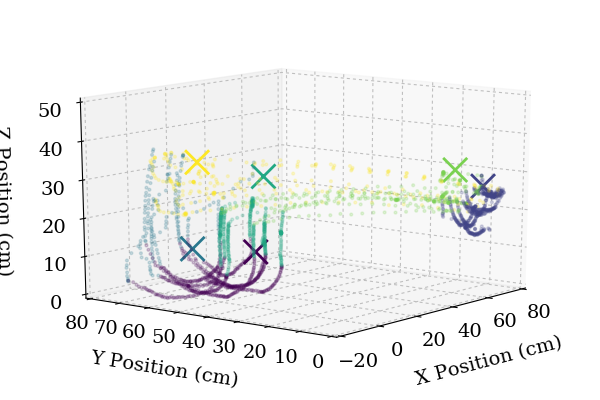

In [91]:
# visualize hand labels for dataset 0
plt.figure()
ax = plt.gca(projection='3d')

ax = excplt.plot_states_3d(df_dropped.iloc[::2], ax, 
                           c=df_dropped['Hand Labels'].values[::2], 
                           alpha=0.2, s=4)

ax.scatter(xm, ym, zm, c=(np.arange(6)), zorder=10, marker='x', s=300, alpha=1)
plt.tight_layout()
# plt.savefig('figs/pred/hand_labeled_pred.pdf', pad_inches=0.5)

___
# Build a Task Model from Above

In [329]:
trans = df_dropped[df_dropped['Hand Labels'].diff(1) != 0]
trans.head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Hand Labels,X,Y,Z,TP Labels,Hand Labels P
Time,,,,,,,,,,,,,,
2.290417,0.000000,0.000000,0.0,0.611053,10.272000,7.970000,4.591245,0.005890,0.0,57.769757,0.340296,24.641957,0,5.0
7.561180,-0.210510,0.000000,0.0,0.000000,10.228286,4.604195,4.567698,1.544289,1.0,1.792717,67.615522,35.635202,2,2.0
10.146881,0.000000,0.999969,0.0,0.000000,7.503968,4.690024,5.925060,1.668971,2.0,-6.488408,65.877912,7.191675,3,0.0
16.150009,0.982605,0.000000,0.0,0.000000,7.683387,7.359625,10.283500,1.668971,3.0,-4.627894,46.987799,16.539926,4,3.0
21.813103,0.000000,0.000000,0.0,-0.999969,9.140080,7.391750,10.191036,1.450041,4.0,5.582598,46.005866,25.110895,5,4.0


In [330]:
(trans.groupby('Hand Labels').mean()
     [[lbl + ' Ms' for lbl in excplt.labels]])

,Boom Ms,Stick Ms,Bucket Ms,Swing Ms
Hand Labels,,,,
0.0,10.121429,7.192419,5.080959,-0.009054
1.0,9.912616,5.000094,4.807693,1.503056
2.0,7.707589,4.955920,4.966617,1.602321
3.0,7.467419,9.164994,9.509287,1.596758
4.0,9.318716,9.183954,9.781128,1.511782
5.0,9.864517,7.707473,9.751286,-0.054105


In [337]:
# The subgoal ordering is shifted because of the way we identified them
means = np.roll(trans.groupby('Hand Labels')
    .mean()[[lbl + ' Ms' for lbl in excplt.labels]].values, -1, axis=0)

print(np.array_str(means, precision=3))

[[  9.913e+00   5.000e+00   4.808e+00   1.503e+00]
 [  7.708e+00   4.956e+00   4.967e+00   1.602e+00]
 [  7.467e+00   9.165e+00   9.509e+00   1.597e+00]
 [  9.319e+00   9.184e+00   9.781e+00   1.512e+00]
 [  9.865e+00   7.707e+00   9.751e+00  -5.411e-02]
 [  1.012e+01   7.192e+00   5.081e+00  -9.054e-03]]


In [357]:
obs = (trans[trans['Hand Labels'] == 0]
       [[lbl + ' Ms' for lbl in excplt.labels]].values.T)
cov = np.cov(obs)
cov

array([[ 0.01486286,  0.01672077, -0.01167443,  0.00100377],
       [ 0.01672077,  0.78943927, -0.36259454,  0.02273378],
       [-0.01167443, -0.36259454,  0.23175721, -0.01316465],
       [ 0.00100377,  0.02273378, -0.01316465,  0.00238976]])

In [358]:
np.linalg.eig(cov)

(array([ 0.96914938,  0.0534909 ,  0.01420019,  0.00160863]),
 array([[ 0.02114031,  0.07905825, -0.99625961, -0.02774305],
        [ 0.89652247, -0.44261514, -0.01583791, -0.00940577],
        [-0.44166181, -0.89255015, -0.08133932,  0.04090231],
        [ 0.02711831,  0.03458133, -0.0244923 ,  0.99873363]]))

In [365]:
# Covariances are a bit trickier with Pandas multiIndexing so use np
covs = np.zeros((6, 4, 4))

for s in set(trans['Hand Labels']):
    obs = (trans[trans['Hand Labels'] == s]
       [[lbl + ' Ms' for lbl in excplt.labels]].values.T)
    covs[int(s)] = np.cov(obs)
    
covs = np.roll(covs, -1, axis=0)
covs

array([[[  1.73099392e-01,  -6.92626430e-02,   5.33670155e-02,
           4.14427963e-02],
        [ -6.92626430e-02,   8.21101251e-01,  -1.41814079e-01,
           3.16150061e-02],
        [  5.33670155e-02,  -1.41814079e-01,   1.79812565e-01,
          -2.18252180e-02],
        [  4.14427963e-02,   3.16150061e-02,  -2.18252180e-02,
           5.66613121e-02]],

       [[  1.71765205e-01,   1.45881123e-01,   3.13695973e-02,
          -3.76332124e-03],
        [  1.45881123e-01,   7.26427084e-01,  -2.33974572e-01,
           4.62484295e-02],
        [  3.13695973e-02,  -2.33974572e-01,   6.75680593e-01,
          -7.06757667e-02],
        [ -3.76332124e-03,   4.62484295e-02,  -7.06757667e-02,
           4.41728517e-02]],

       [[  4.35427141e-02,   1.16592466e-01,  -3.18216247e-02,
           1.62892925e-03],
        [  1.16592466e-01,   2.51146058e+00,  -9.63234023e-01,
          -6.09188651e-02],
        [ -3.18216247e-02,  -9.63234023e-01,   5.49777791e-01,
          -1.43828008e-

In [368]:
# positive semidefinite assertion
assert (np.array([np.linalg.eig(cov)[0] for cov in covs]) > 0).all()

In [233]:
xm, ym, zm = kin.forward_kin_array(means).T

<IPython.core.display.Javascript object>


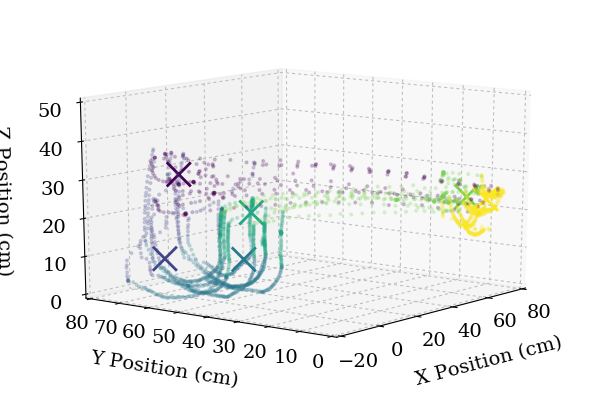

In [234]:
# New subgoal model
# visualize hand labels for dataset 0
plt.figure()
ax = plt.gca(projection='3d')

ax = excplt.plot_states_3d(df_dropped.iloc[::2], ax, 
                           c=df_dropped['Hand Labels'].values[::2], 
                           alpha=0.2, s=4)

ax.scatter(xm, ym, zm, c=(np.arange(6)), zorder=10, marker='x', s=300, alpha=1)
plt.tight_layout()
# plt.savefig('figs/pred/hand_labeled_pred.pdf', pad_inches=0.5)

# Neat!

___

## FSM Prediction (aka Trigger Prediction)

In [225]:
from sgs_0413 import sg_model
from copy import deepcopy

In [226]:
sgm = deepcopy(sg_model)

In [228]:
sgm

[{'it': [3, 0.5],
  'npt': [1, 2, 1.5, 0.25],
  'onpt': [],
  'subgoal': 1,
  'subgoal_pos': [9.74071429, 5.07757037, 4.10446154, 1.29099823]},
 {'it': [0, -0.5],
  'npt': [1, 1.5, 2, 0.25],
  'onpt': [],
  'subgoal': 2,
  'subgoal_pos': [7.58350403226, 3.96200510856, 3.36723245703, 1.52293612621]},
 {'it': [1, 0.5],
  'npt': [1, 2.5, 1, 0.25],
  'onpt': [],
  'subgoal': 3,
  'subgoal_pos': [7.38391935484, 7.59597462121, 9.85991071428, 1.52293612621]},
 {'it': [0, 0.5],
  'npt': [1, 2.5, 1, 0.25],
  'onpt': [],
  'subgoal': 4,
  'subgoal_pos': [9.85271825397, 7.60537462121, 10.2360376984, 1.52293612621]},
 {'it': [3, -0.5],
  'npt': [1, 1.8, 1, 0.1],
  'onpt': [],
  'subgoal': 5,
  'subgoal_pos': [9.97700396824, 8.13428125, 10.2288055556, 0.11780972451]},
 {'it': [2, -0.5],
  'npt': [1, 1.3, 1.2, 0.1],
  'onpt': [],
  'subgoal': 6,
  'subgoal_pos': [9.9453968254, 8.13428125, 3.42044721767, 0.11780972451]}]

In [235]:
for sg in sgm:
    sg['subgoal_pos'] = means[sg['subgoal'] - 1]

In [137]:
# for sg in sgm:
#     sg['subgoal_pos'] = means_ord[sg['subgoal'] - 1]
#     if sg['subgoal'] == 5:
#         sg['subgoal_pos'][3] = 0
#     if sg['subgoal'] == 6:
#         sg['subgoal_pos'][0] = 
#         sg['subgoal_pos'][3] = 0

In [236]:
sgm

[{'it': [3, 0.5],
  'npt': [1, 2, 1.5, 0.25],
  'onpt': [],
  'subgoal': 1,
  'subgoal_pos': array([ 9.91261587,  5.00009405,  4.8076927 ,  1.50305574])},
 {'it': [0, -0.5],
  'npt': [1, 1.5, 2, 0.25],
  'onpt': [],
  'subgoal': 2,
  'subgoal_pos': array([ 7.70758931,  4.95592041,  4.96661677,  1.60232134])},
 {'it': [1, 0.5],
  'npt': [1, 2.5, 1, 0.25],
  'onpt': [],
  'subgoal': 3,
  'subgoal_pos': array([ 7.46741935,  9.16499446,  9.50928659,  1.5967581 ])},
 {'it': [0, 0.5],
  'npt': [1, 2.5, 1, 0.25],
  'onpt': [],
  'subgoal': 4,
  'subgoal_pos': array([ 9.31871619,  9.18395437,  9.78112783,  1.51178238])},
 {'it': [3, -0.5],
  'npt': [1, 1.8, 1, 0.1],
  'onpt': [],
  'subgoal': 5,
  'subgoal_pos': array([ 9.86451683,  7.70747333,  9.75128577, -0.05410521])},
 {'it': [2, -0.5],
  'npt': [1, 1.3, 1.2, 0.1],
  'onpt': [],
  'subgoal': 6,
  'subgoal_pos': array([  1.01214286e+01,   7.19241925e+00,   5.08095887e+00,
          -9.05389549e-03])}]

`sgm` should be ready now

In [254]:
tp = pred.TriggerPrediction(sgm, mode=1, alpha=0.5)

In [255]:
sgs = []
alphas = []

for s, a in tqdm(zip(df_dropped[[lbl + ' Ms' for lbl in excplt.labels]].values,
                df_dropped[[lbl + ' Cmd' for lbl in excplt.labels]].values)):
    tp.update(s, a)
    sgs.append(tp.subgoal)
    alphas.append(tp.active * tp.alpha)

100%|██████████| 4739/4739 [00:00<00:00, 11462.01it/s]


In [256]:
np.bincount(sgs), set(sgs)

(array([1072,  754,  393, 1304,  470,  746]), {0, 1, 2, 3, 4, 5})

In [257]:
# Turn of subgoals where alpha is zero
sgs_off = []

for sg, al in zip(sgs, alphas):
    if al == 0:
        sgs_off.append(6)
    else:
        sgs_off.append(sg)

In [258]:
np.bincount(sgs_off)

array([ 778,  251,  181,  785,  355,  281, 2108])

In [259]:
cm = plt.get_cmap('viridis')
mpl.colors.to_rgba('gray')

(0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 1.0)

In [260]:
# colors for subgoals and gray for no subgoal
colors = [cm(i) for i in np.linspace(0, 1, 6)] + [mpl.colors.to_rgba('gray')]
rgba = np.array(colors)

In [261]:
sg_colors = [rgba[i] for i in sgs]
sg_off_colors = [rgba[i] for i in sgs_off]

<IPython.core.display.Javascript object>


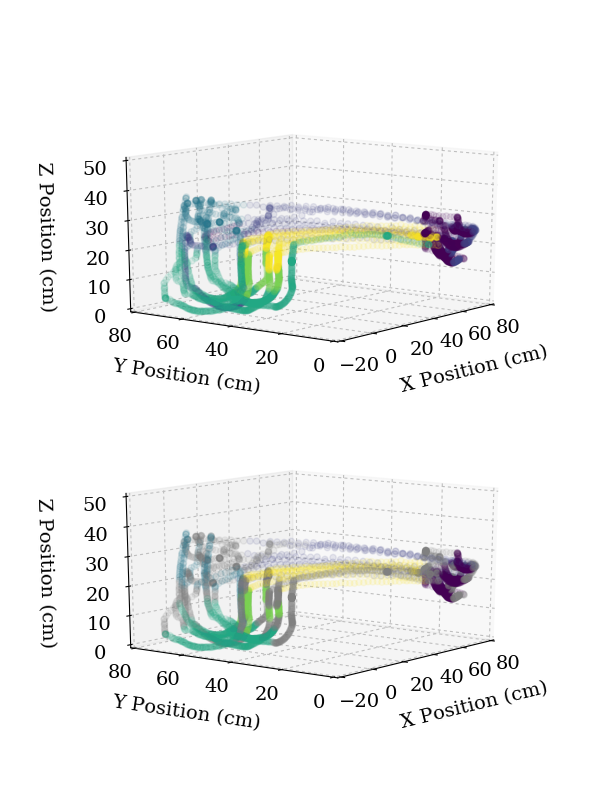

In [262]:
plt.figure(figsize=(6, 8))

ax1 = plt.subplot(211, projection='3d')
ax1 = excplt.plot_states_3d(df_dropped.iloc[::1], ax1, c=sg_colors, alpha=0.1)
# cm = plt.colorbar(ax1)
# ax1.scatter(xm_old, ym_old, zm_old, c=range(1, 7), zorder=10, marker='o', s=300)

ax2 = plt.subplot(212, projection='3d')
ax2 = excplt.plot_states_3d(df_dropped, ax2, c=sg_off_colors, alpha=0.1)
# ax2.scatter(xm_old, ym_old, zm_old, c=range(1, 7), zorder=10, marker='o', s=300)

In [271]:
len(df_dropped)

4739

In [278]:
np.count_nonzero((df_dropped['Hand Labels'] + 1 % 5) == df_dropped['TP Labels'])

2097

In [298]:
cs = [cm(i) for i in np.linspace(0, 1, 6)]
hc = [cs[(int(i) + 1) % 6] for i in df_dropped['Hand Labels']]
tc = [cs[int(i)] for i in df_dropped['TP Labels']]

<IPython.core.display.Javascript object>


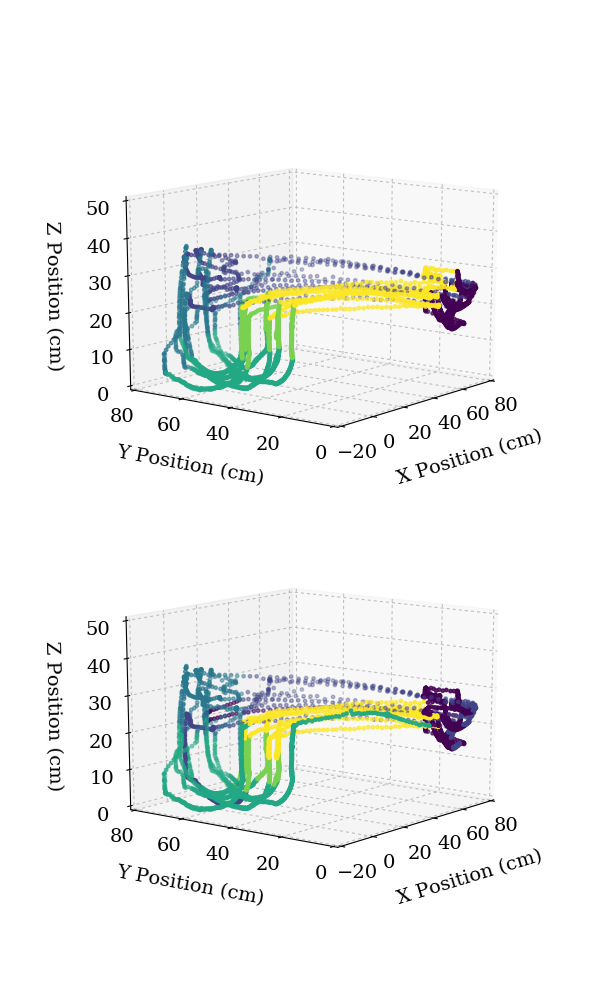

In [310]:
plt.figure(figsize=(6, 10))

ax1 = plt.subplot(211, projection='3d')
excplt.plot_states_3d(df_dropped, ax=ax1, c=hc, s=6)

ax2 = plt.subplot(212, projection='3d')
excplt.plot_states_3d(df_dropped, ax=ax2, c=tc, s=6)

### Blending Inactive Accuracy

In [316]:
success = np.count_nonzero(((df_dropped['Hand Labels'] + 1) % 6) == df_dropped['TP Labels'])
print('{} samples were labeled correctly, success rate {:.2f}%'
      .format(success, (float(success) / len(df_dropped)) * 100))

2886 samples were labeled correctly, success rate 60.90%


### Blending Active Accuracy

Should be higher.

In [315]:
als = np.array(alphas)
alpha_slice_hand = (df_dropped[als != 0]['Hand Labels'] + 1) % 6
alpha_slice_tp = df_dropped[als != 0]['TP Labels']
active_len = len(alpha_slice_tp)

success = np.count_nonzero(alpha_slice_hand == alpha_slice_tp)
print('{} samples were labeled correctly, success rate {:.2f}%'
      .format(success, (float(success) / active_len) * 100))

2497 samples were labeled correctly, success rate 94.91%


In [317]:
# save keystrokes
dfd = df_dropped.copy()

___

# GMM for SG-AC, MVN-AC

In [369]:
# new transition matrix is all we require
trans = np.roll(np.eye(6), 1, axis=0)
trans

array([[ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.]])

In [370]:
new_model = {
    'means': means,
    'covs': covs,
    'trans': trans,
    'queues': []
}

In [371]:
with open('gmm_model_hand.pkl', 'wb') as pkf:
    pickle.dump(new_model, pkf)

## Action Comparison Based Prediction (ACP)

In [466]:
reload(pred)

<module 'exc_analysis.prediction' from '/Users/mitchallain/Development/Python/exc_analysis/exc_analysis/prediction.pyc'>

In [467]:
states = df_dropped[[lbl + ' Ms' for lbl in excplt.labels]].values
actions = df_dropped[[lbl + ' Cmd' for lbl in excplt.labels]].values

In [492]:
sac = pred.ActionCompPredictor(filename='gmm_model_hand.pkl')

In [493]:
# for i in range(100):
#     sac.update(states[i], actions[i])
#     print(sac.subgoal, sac.likelihood, sac.subgoal_probability)
#     raw_input('')

In [494]:
tr = 0
sgs = []
sgps = []
alphas = []
lls = []

for s, a in tqdm(zip(df_dropped[[lbl + ' Ms' for lbl in excplt.labels]].values,
                df_dropped[[lbl + ' Cmd' for lbl in excplt.labels]].values)):
    sac.update(s, a)
    sgs.append(sac.subgoal)
    sgps.append(sac.subgoal_probability)
    alphas.append(sac.alpha)
    lls.append(sac.likelihood)

100%|██████████| 4739/4739 [00:12<00:00, 369.70it/s]


In [471]:
np.bincount(np.array(sgs)), set(sgs)

(array([ 754,  407, 1039,  748,  598, 1193]), {0, 1, 2, 3, 4, 5})

In [495]:
df_dropped['ACP Labels'] = np.array(sgs)
df_dropped['ACP MAP'] = np.max(np.array(sgps), axis=1)
df_dropped['ACP Alpha'] = np.array(alphas)

In [473]:
# cs = [cm(i) for i in np.linspace(0, 1, 6)]
# hc = [cs[(int(i) + 1) % 6] for i in df_dropped['Hand Labels']]
ac = [cs[(int(i) + 1) % 6] for i in df_dropped['ACP Labels']]

<IPython.core.display.Javascript object>


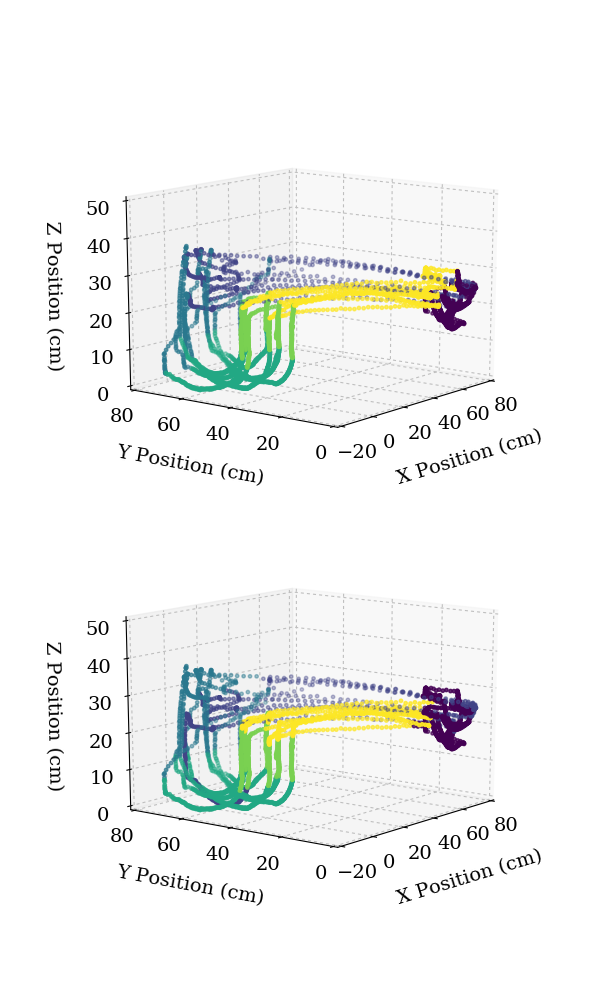

In [474]:
plt.figure(figsize=(6, 10))

ax1 = plt.subplot(211, projection='3d')
excplt.plot_states_3d(df_dropped, ax=ax1, c=hc, s=6)

ax2 = plt.subplot(212, projection='3d')
excplt.plot_states_3d(df_dropped, ax=ax2, c=ac, s=6)

### Blending Inactive Accuracy

In [475]:
success = np.count_nonzero(df_dropped['Hand Labels'] == df_dropped['ACP Labels'])
print('{} samples were labeled correctly, success rate {:.2f}%'
      .format(success, (float(success) / len(df_dropped)) * 100))

3740 samples were labeled correctly, success rate 78.92%


### Blending Active Accuracy

Should be higher.

In [476]:
als = np.array(alphas)
alpha_slice_hand = df_dropped[als != 0]['Hand Labels']
alpha_slice_tp = df_dropped[als != 0]['ACP Labels']
active_len = len(alpha_slice_tp)

success = np.count_nonzero(alpha_slice_hand == alpha_slice_tp)
print('{} samples were labeled correctly, success rate {:.2f}%'
      .format(success, (float(success) / active_len) * 100))

3669 samples were labeled correctly, success rate 79.71%


## Multivariate Normal Action Comparison (MVN-AC) Prediction

In [452]:
reload(pred)

<module 'exc_analysis.prediction' from '/Users/mitchallain/Development/Python/exc_analysis/exc_analysis/prediction.py'>

In [496]:
gp = pred.GaussianPredictor(filename='gmm_model_hand.pkl')

In [497]:
tr = 0
sgs = []
sgps = []
alphas = []
lls = []

for s, a in tqdm(zip(df_dropped[[lbl + ' Ms' for lbl in excplt.labels]].values,
                df_dropped[[lbl + ' Cmd' for lbl in excplt.labels]].values)):
    sgs.append(gp.subgoal)
    sgps.append(gp.subgoal_probability)
    alphas.append(gp.alpha)
    lls.append(gp.likelihood)
    
    gp.update(s, a)

100%|██████████| 4739/4739 [00:37<00:00, 127.90it/s]


In [498]:
lbls = np.array(sgs)
lbls[0] = 0

In [499]:
df_dropped['MVN Labels'] = lbls
df_dropped['MVN MAP'] = np.max(np.array(sgps), axis=1)
df_dropped['MVN Alphas'] = np.array(alphas)

In [500]:
np.bincount(lbls)

array([ 755,  407, 1039,  748,  643, 1147])

In [490]:
np.max(np.array(sgps), axis=1).shape

(4739,)

In [482]:
# cs = [cm(i) for i in np.linspace(0, 1, 6)]
# hc = [cs[(int(i) + 1) % 6] for i in df_dropped['Hand Labels']]
mc = [cs[(int(i) + 1) % 6] for i in df_dropped['MVN Labels']]

<IPython.core.display.Javascript object>


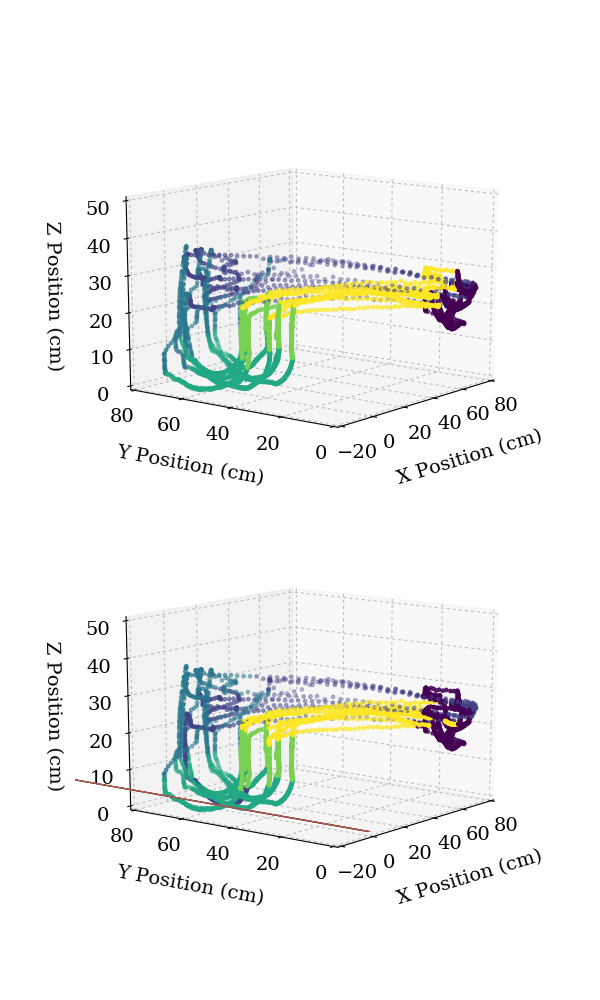

In [483]:
plt.figure(figsize=(6, 10))

ax1 = plt.subplot(211, projection='3d')
excplt.plot_states_3d(df_dropped, ax=ax1, c=hc, s=6)

ax2 = plt.subplot(212, projection='3d')
excplt.plot_states_3d(df_dropped, ax=ax2, c=mc, s=6)

### Blending Inactive Accuracy

In [484]:
success = np.count_nonzero(df_dropped['Hand Labels'] == df_dropped['ACP Labels'])
print('{} samples were labeled correctly, success rate {:.2f}%'
      .format(success, (float(success) / len(df_dropped)) * 100))

3740 samples were labeled correctly, success rate 78.92%


### Blending Active Accuracy

Should be higher.

In [485]:
als = np.array(alphas)
alpha_slice_hand = df_dropped[als != 0]['Hand Labels']
alpha_slice_tp = df_dropped[als != 0]['ACP Labels']
active_len = len(alpha_slice_tp)

success = np.count_nonzero(alpha_slice_hand == alpha_slice_tp)
print('{} samples were labeled correctly, success rate {:.2f}%'
      .format(success, (float(success) / active_len) * 100))

3621 samples were labeled correctly, success rate 80.59%


___

<IPython.core.display.Javascript object>


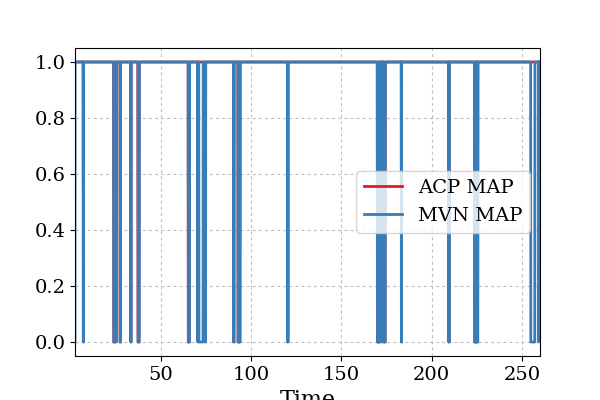

In [505]:
df_dropped[['ACP MAP', 'MVN MAP']].plot()

In [506]:
%matplotlib inline

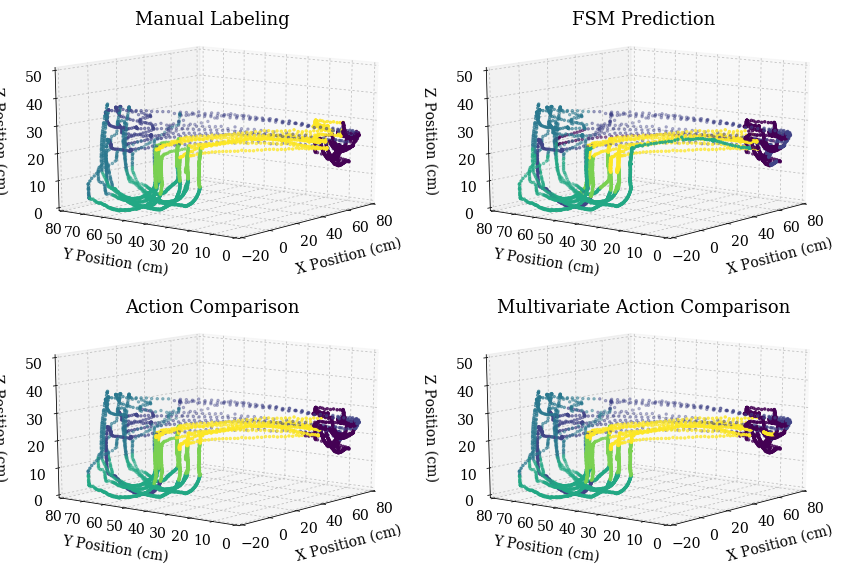

In [518]:
plt.figure(figsize=(12, 8))

labels = [hc, tc, ac, mc]
titles = ['Manual Labeling', 'FSM Prediction', 'Action Comparison', 'Multivariate Action Comparison']
# accuracy = [,80.59]

for i, labels in enumerate(labels):
    ax = plt.subplot(2, 2, i + 1, projection='3d')
    excplt.plot_states_3d(df_dropped, ax=ax, c=labels, s=6)
    plt.title(titles[i])

plt.tight_layout(h_pad=2, w_pad=2)
plt.savefig('figs/pred/comparison.pdf', pad_inches=1)

____

In [162]:
with open('gmm_model_0524.pkl', 'rb') as pkf:
    model = pickle.load(pkf)

temp = kin.forward_kin_array(model['means'])
temp.shape

(7, 3)

In [179]:
# xm, ym, zm = np.vstack((np.array([0, 0, 0]), temp)).T
xm, ym, zm = temp.T

In [164]:
np.array(sgp).shape

(5217, 7)

In [177]:
new_sgs = []

for s, p in zip(sg, sgp):
    if max(p) > 0.7:
        new_sgs.append(s)
    else:
        new_sgs.append(-1)

new_sgs = np.array(new_sgs)
np.bincount(new_sgs + 1)

array([1448,  823,  825,  145, 1344,  536,    0,   96])

<IPython.core.display.Javascript object>


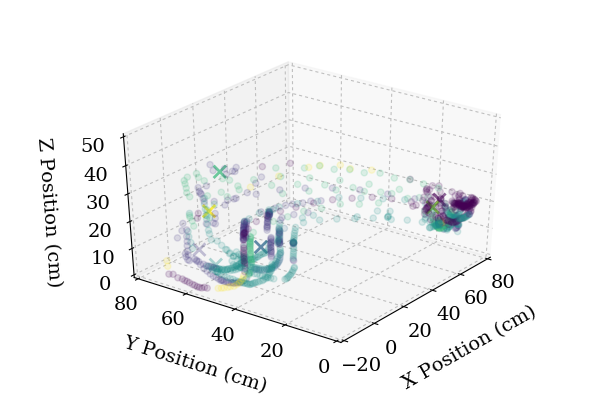

In [184]:
plt.figure(figsize=(6, 4))
ax = plt.gca(projection='3d')

ax = excplt.plot_states_3d(dfs[tr][new_sgs != -1].iloc[::4],
                           ax, c=(new_sgs[new_sgs != -1][::4] + 1), alpha=0.15)

ax.scatter(xm, ym, zm, c=range(7), zorder=10, marker='x', s=80)

Informative.

___

## Deterministic Prediction

Try it with old subgoal model first.

In [16]:
reload(pred)

<module 'exc_analysis.prediction' from '/Users/mitchallain/Development/Python/exc_analysis/exc_analysis/prediction.pyc'>

In [17]:
from sgs_0413 import sg_model
from copy import deepcopy

In [18]:
sgm = deepcopy(sg_model)

In [19]:
tp = pred.TriggerPrediction(sg_model, mode=1, alpha=0.5)

In [20]:
sgs = []
alphas = []

for s, a in tqdm(zip(dfs[tr][[lbl + ' Ms' for lbl in excplt.labels]].values,
                dfs[tr][[lbl + ' Cmd' for lbl in excplt.labels]].values)):
    tp.update(s, a)
    sgs.append(tp.subgoal)
    alphas.append(tp.active * tp.alpha)

100%|██████████| 5217/5217 [00:00<00:00, 11594.86it/s]


In [21]:
# Turn of subgoals where alpha is zero
sgs_off = []

for sg, al in zip(sgs, alphas):
    if al == 0:
        sgs_off.append(0)
    else:
        sgs_off.append(sg)

In [22]:
means = np.array([sg['subgoal_pos'] for sg in sg_model])

In [23]:
xm_old, ym_old, zm_old = kin.forward_kin_array(means).T

In [24]:
cm = plt.get_cmap('Paired')
mpl.colors.to_rgba('gray')

(0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 1.0)

In [25]:
cm.colors

((0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392))

In [26]:
# colors for subgoals and gray for no subgoal
colors = [mpl.colors.to_rgba('gray')] + [cm(i) for i in np.linspace(0, 1, 6)]
rgba = np.array(colors)

In [27]:
sg_colors = [rgba[i] for i in sgs]
sg_off_colors = [rgba[i] for i in sgs_off]

<IPython.core.display.Javascript object>


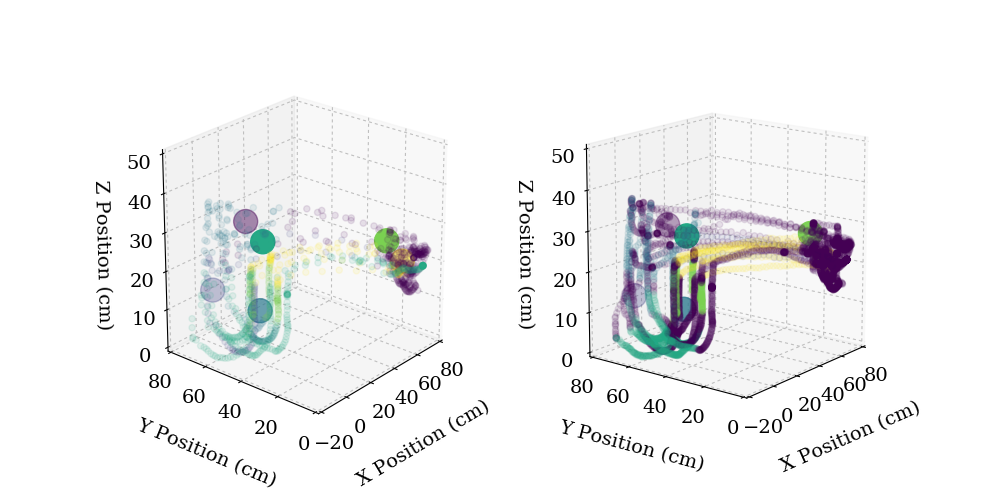

In [32]:
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(121, projection='3d')
ax1 = excplt.plot_states_3d(dfs[tr].iloc[::5], ax1, c=sgs[::5], alpha=0.1)
ax1.scatter(xm_old, ym_old, zm_old, c=range(1, 7), zorder=10, marker='o', s=300)

ax2 = plt.subplot(122, projection='3d')
ax2 = excplt.plot_states_3d(dfs[tr], ax2, c=sgs_off, alpha=0.1)
ax2.scatter(xm_old, ym_old, zm_old, c=range(1, 7), zorder=10, marker='o', s=300)

## Swap old sg_model with new subgoals

<IPython.core.display.Javascript object>


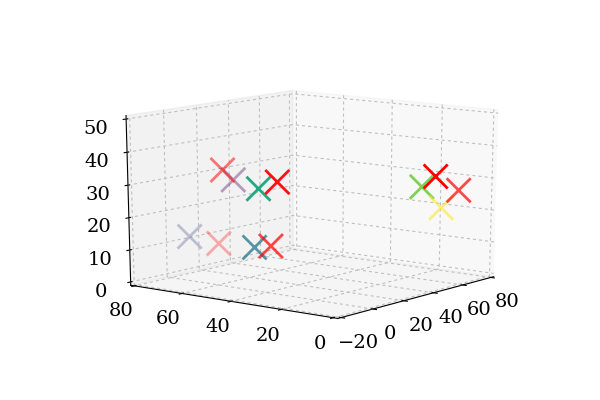

In [51]:
# first visualize
plt.figure()
ax = plt.gca(projection='3d')

ax.scatter(xm, ym, zm, c='r', marker='x', s=300)
ax.scatter(xm_old, ym_old, zm_old, c=col, marker='x', s=300)

excplt.orient_plot(ax)